# Assignment 1: Deep learning with AlexNet and CIFAR10

This assignment aims at familiarizing you with training and testing the AlexNet neural network for an image classification task. You will go through the process of loading data, preprocessing images, building the AlexNet model, and evaluating its performance. You will have to do:
1.  **(5 points) Coding tasks:** The following questions involve writing code to complete specific tasks.  
    1.1 *(1 point)* Load the dataset (done) and perform image preprocessing (done), then split the data into training, validation, and test sets to prepare it for model training and evaluation.  
    1.2 *(1 point)* Implement the vanilla AlexNet architecture from scratch, referred to as AlexNet version 1, by explicitly defining each layer in sequence for the image classification task. Since AlexNet was not originally designed for the assignment dataset (i.e., CIFAR 10), you will need to make appropriate modifications to adapt the model, such as adjusting the input dimensions and the output layer.  
    1.3 *(1 point)* Evaluate the performance of AlexNet version 1 using appropriate evaluation metrics and report the results.  
    1.4 *(1 point)* Develop an enhanced model, AlexNet version 2, by adding or modifying architectural components with the goal of improving performance over AlexNet version 1. Clearly describe the design choices made.  
    1.5 *(1 point)* Evaluate the performance of AlexNet version 2 and compare it with AlexNet version 1. Provide clear observations and analysis on how the architectural enhancements affected model effectiveness.  

2.  **(5 points) Open discussion questions:** These discussion questions ask you to analyze and argue your points.  Feel free to include relevant code examples to strengthen your arguments.  
    2.1 *(1 point)* Preprocessing choices implicitly define the input distribution seen by the model. Select one preprocessing step you applied (for example normalization scheme, resizing method, or color space handling) and explain how it changes the geometry of the optimization landscape and the types of features the network can learn. Why might a different choice lead to slower convergence or worse generalization?  
    2.2 *(1 point)* AlexNet contains multiple design elements such as large early kernels, aggressive downsampling, and deep fully connected layers. Based on your implementation and results, which of these elements do you believe are essential for AlexNet performance on your dataset, and which ones are largely incidental? Defend your answer using both intuition and experimental evidence.  
    2.3 *(1 point)* When you modified AlexNet version 1 to obtain AlexNet version 2, how can you distinguish a genuine architectural improvement from a performance gain caused by randomness, training dynamics, or favorable initialization? Describe specific experimental controls or validation strategies that would support your conclusion.  
    2.4 *(1 point)* Beyond reporting a higher accuracy, how would you diagnose where AlexNet version 2 improves over version 1 and where it still fails? Discuss how error analysis techniques such as confusion matrices, per class metrics, or misclassified example inspection can reveal strengths and weaknesses of the model.  
    2.5 *(1 point)* Modern models are often built on large pretrained backbones, meaning networks that have already been trained on massive datasets such as ImageNet and are then adapted to new tasks using transfer learning. In this context, what important insights do you gain by training AlexNet entirely from random initialization, without any pretrained weights, that might be hidden or overlooked when starting from a pretrained model?  

The dataset you will be working on is CIFAR10 dataset. CIFAR10 (https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follow the ten object classes:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Here follows some data samples in the dataset:

![alt text](https://docs.pytorch.org/tutorials/_images/cifar10.png)

### Submission {-}
The submitted Jupyter notebook must be named according to the following format:

- ./\<StudentID>-assignment1-notebook.ipynb: Jupyter notebook containing source code.

For example, if your student ID is 2012345, the notebook should be named 2012345-assignment1-notebook.ipynb.
    
### Evaluation {-}
The assignment will be evaluated based on how complete and correct your implementation is, and how clear and well reasoned your answers are in the open discussion questions. In particular:
- The models must be properly trained, showing neither clear overfitting nor clear underfitting.
- Model evaluation must be done on a separate test set that is not used for training or tuning.
- Your analysis should show a clear understanding of training behavior, convergence, and generalization.

In addition, your code must follow good Python coding practices, including clear structure, readable naming, appropriate comments, and compliance with a standard coding convention such as PEP 8.

### Deadline {-}
Please visit Canvas for details.

### Reference {-}:
Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton, "Imagenet classification with deep convolutional neural networks", NIPS'12. Link to the paper: https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

### Note {-}:
If you encounter an Out-Of-Memory (OOM) issue, it is acceptable to reduce the input spatial dimensions to a smaller size, such as 32x32x3, instead of using the original AlexNet input size of 227x227x3

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [2]:
# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step
Train shape: X_train = (50000, 32, 32, 3), y_train = (50000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


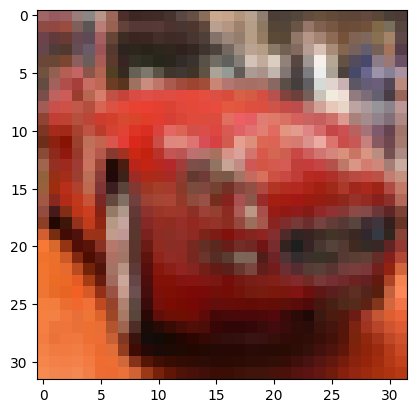

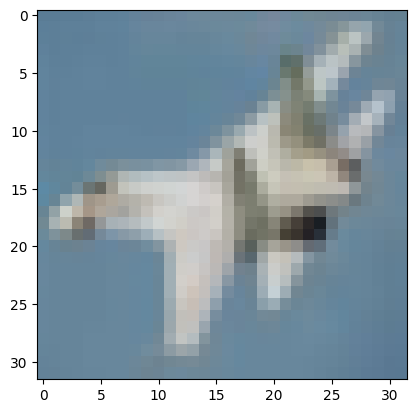

In [3]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

In [4]:
# Normalize pixel values
X_train, X_test = X_train/255.0, X_test/255.0

## 1. Coding tasks

In [ ]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.1

In [ ]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.2

In [ ]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.3

In [ ]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.4

In [ ]:
# Your code goes here. Please make sure to explain the reasons behind your data processing and modeling choices.
# 1.5

## 2. Open discussion questions

In [ ]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.1

In [ ]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.2

In [ ]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.3

In [ ]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.4

In [ ]:
# Your argument goes here. Support your claims with relevant code, experimental results, and analytical discussion.
# 2.5